# CNN – MNIST Digits Classification
Objectif : entraîner un CNN sur MNIST (10 chiffres)
et analyser l’impact du nombre de convolutions (2 vs 3).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [6]:
IMG_SIZE = (28, 28)
BATCH_SIZE = 32
EPOCHS = 20

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)   # (10000, 28, 28, 1)

y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes=10)




x_train: (60000, 28, 28) uint8
y_train: (60000,) uint8
x_test : (10000, 28, 28) uint8
y_test : (10000,) uint8
x_train: (60000, 28, 28, 1)
y_train_cat: (60000, 10)


In [8]:
def build_cnn(nb_conv):
    model = Sequential()

    # 1ère convolution
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))

    # 2ème convolution
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    # 3ème convolution OPTIONNELLE
    if nb_conv == 3:
        model.add(Conv2D(64, (3,3), activation='relu'))
        model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # 10 classes (0..9)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [9]:
def get_callbacks(nb_conv):
    ckpt_dir = f"checkpoints_mnist_cnn_{nb_conv}"
    os.makedirs(ckpt_dir, exist_ok=True)

    checkpoint = ModelCheckpoint(
        filepath=os.path.join(ckpt_dir, "weights_epoch_{epoch:02d}.h5"),
        monitor="val_accuracy",
        save_weights_only=True,
        save_best_only=True,
        verbose=1
    )

    early_stop = EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    return checkpoint, early_stop, ckpt_dir

In [10]:
model_2 = build_cnn(nb_conv=2)
checkpoint, early_stop, ckpt_dir = get_callbacks(2)

history_2 = model_2.fit(
    x_train, y_train_cat,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test_cat),
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9315
Epoch 1: val_accuracy improved from -inf to 0.98620, saving model to checkpoints_mnist_cnn_2\weights_epoch_01.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2265 - accuracy: 0.9316 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 2/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0857 - accuracy: 0.9738
Epoch 2: val_accuracy improved from 0.98620 to 0.98830, saving model to checkpoints_mnist_cnn_2\weights_epoch_02.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0856 - accuracy: 0.9738 - val_loss: 0.0345 - val_accuracy: 0.9883
Epoch 3/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9807
Epoch 3: val_accuracy improved from 0.98830 to 0.99010, saving model to checkpoints_mnist_cnn_2\weights_epoch_03.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0635 - accuracy: 0.9807 -

In [11]:
model_3 = build_cnn(nb_conv=3)
checkpoint, early_stop, ckpt_dir = get_callbacks(3)

history_3 = model_3.fit(
    x_train, y_train_cat,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test_cat),
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.9129
Epoch 1: val_accuracy improved from -inf to 0.97750, saving model to checkpoints_mnist_cnn_3\weights_epoch_01.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2849 - accuracy: 0.9131 - val_loss: 0.0744 - val_accuracy: 0.9775
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.9706
Epoch 2: val_accuracy improved from 0.97750 to 0.98080, saving model to checkpoints_mnist_cnn_3\weights_epoch_02.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1011 - accuracy: 0.9706 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 3/20
1868/1875 [============================>.] - ETA: 0s - loss: 0.0729 - accuracy: 0.9787
Epoch 3: val_accuracy improved from 0.98080 to 0.98180, saving model to checkpoints_mnist_cnn_3\weights_epoch_03.h5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0727 - accuracy: 0.9787 -

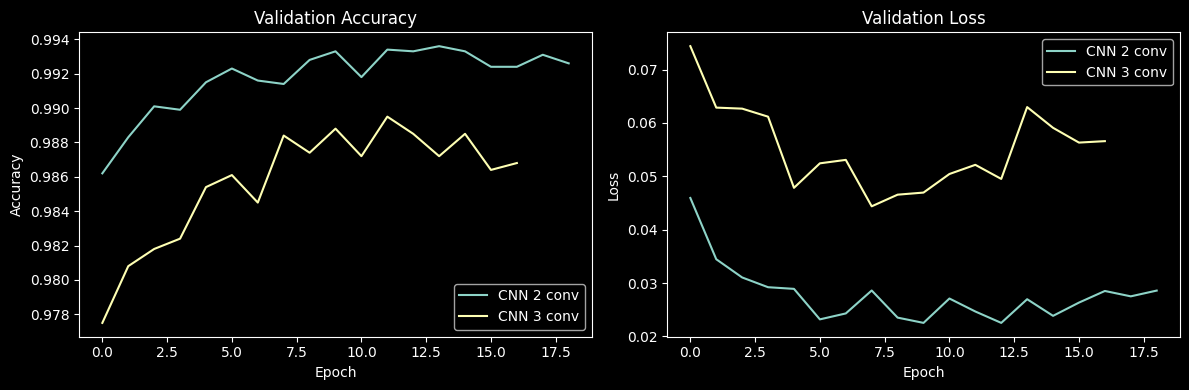

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_2.history["val_accuracy"], label="CNN 2 conv")
plt.plot(history_3.history["val_accuracy"], label="CNN 3 conv")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_2.history["val_loss"], label="CNN 2 conv")
plt.plot(history_3.history["val_loss"], label="CNN 3 conv")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()